# *Laptop Price Predictor*

In [230]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os # Path to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt # Data visulization
import seaborn as sns  # Data visulization
import warnings # warning filter
%matplotlib inline


#train test split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score as CVS, StratifiedKFold
from sklearn.pipeline import Pipeline

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#metrics

#ML models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


# Metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

## Setting Seaborn
sns.set(style='white', context='paper', palette='cividis')

In [231]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop/laptop_data.csv


In [232]:
lap_df = pd.read_csv('/kaggle/input/laptop/laptop_data.csv')
lap_df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
272,272,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 520,Linux,2.14kg,39164.5296
1023,1023,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64kg,63159.7104
965,965,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,24808.2336
1075,1075,Lenovo,Notebook,17.3,1600x900,Intel Core i5 6200U 2.3GHz,8GB,1.0TB HDD,AMD Radeon R5 M330,Windows 10,3.0kg,35111.5200
1200,1200,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,128GB SSD,AMD Radeon R7 M440,Windows 10,2.3kg,26586.7200


# *Data Process* 
* **Data Shape**
* **Data Head/Sample**
* **Data Types**
* **Missing Values**
* **Describe Data**
* **Data Duplicates**
* **Data Correlation**

In [233]:
# Shape
print(f'Dataset (row,col): {lap_df.shape}')

Dataset (row,col): (1303, 12)


In [234]:
# Sample 
lap_df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
443,443,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,128GB SSD,Intel HD Graphics 505,Windows 10,2.2kg,18594.7200
1291,1291,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
885,885,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,95850.7200
1239,1239,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.4kg,79866.7200
1147,1147,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.18kg,53807.4720
470,470,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29kg,106506.7200
90,90,Asus,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,37242.7200
951,951,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,94572.0000
375,375,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon R5,Windows 10,1.91kg,26053.3872
308,308,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.3kg,43636.3200


In [235]:
# check column types
lap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [236]:
# Missing values
print(f'Missing values in Dataset:\n{lap_df.isnull().sum()}')

Missing values in Dataset:
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [237]:
# Descirbe Data
lap_df.describe(include=['number', 'object'])

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1303.00000,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,727,NaN,507,190,619,412,281,1072,121,NaN
mean,651.00000,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59870.042910
std,376.28801,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37243.201786
min,0.00000,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,325.50000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,651.00000,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52054.560000
75%,976.50000,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79274.246400


In [238]:
# Duplicates
print(f'Duplicates in Dataset: {lap_df.duplicated().sum()}')

Duplicates in Dataset: 0


Text(0.5, 1.0, 'Correlations in  Dataset\n')

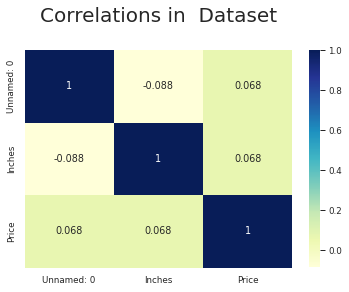

In [239]:
# Correlation in dataset
ax = sns.heatmap(lap_df.corr(), cmap='YlGnBu', annot=True)
ax.set_title('Correlations in  Dataset\n', fontsize=20)

### About Data 
This Dataset consist **1303 rows** and **12 columns**, containing **0** **missing values** and **duplicates**.

#### Description:
    Dataset contains information about **laptops** 

#### Columns:
    ** Company **:             Laptop Company Name
    ** TypeName **:            Laptop Type
    ** Inches **:              Laptop size
    ** ScreenResolution **:    Screen Size
    ** Cpu **:                 CPU Information
    ** Ram **:                 Laptop Ram
    ** Memory **:              Laptop Memory
    ** Gpu **:                 Information about Graphics
    ** OpSys **:               Operating System
    ** Weight **:              Laptop Weight
    ** Price **:               Laptop Price

#### Key Veriables:
    ** ScreenResolution **: Veriable contains **more information** like (HD,4K support, resolution pixels etc)
    ** Cpu **:              Veriable contains **more information** like (processerType, processerSpeed etc)
    ** Gpu **:              Veriable contains **more information** like (Graphic's Company Name, GraphicMem etc)
    ** Memory **:           Veriable contains **more information** like (diskType, Disk size etc)
    
    
#### Observations:
    Most Sold Laptops are from Dell.
    Most Sold Laptops are notebooks.
    Laptops are mostly 15 inches.
    Most Laptops are HD Supported.
    Most Laptops are Intel core i5.
    Most Laptops have 8GB Ram.
    Most Laptops have 256SSD Memory.
    Most Laptops have intel Graphics.
    Most Laptops have window 10 OpSys.
    Most Laptops have almost 2kg weight.
    Laptop Average Price is 31914
    
#### Points to Note:
    Convert weight into numeric.
    Convert Ram into numeric.
    Delete unnamed 0.
    OpSys might not be usefull

In [240]:
# remove Unnamed 0:
lap_df = lap_df[lap_df.columns[1:]]

# Convert weight into numeric
lap_df['Ram'] = lap_df['Ram'].str.replace(r'\D','').astype('int')

# Convert weight into numeric
lap_df['Weight'] = lap_df['Weight'].apply(lambda i:i[:-2]).astype('float')


In [241]:
# Check Data
lap_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# *Exploratory Data Analysis*

Text(0.5, 1.0, 'Correlations in  Dataset\n')

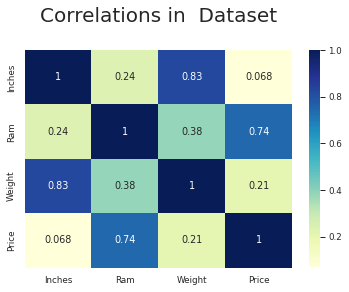

In [242]:
# Correlation in dataset
ax = sns.heatmap(lap_df.corr(), cmap='YlGnBu', annot=True)
ax.set_title('Correlations in  Dataset\n', fontsize=20)

### Observations
* **Price and Inches has slightly +ve relation.**
* **Price and Ram has slightly -ve relation which is strange.**
* **Price and Weight has +ve relation.**

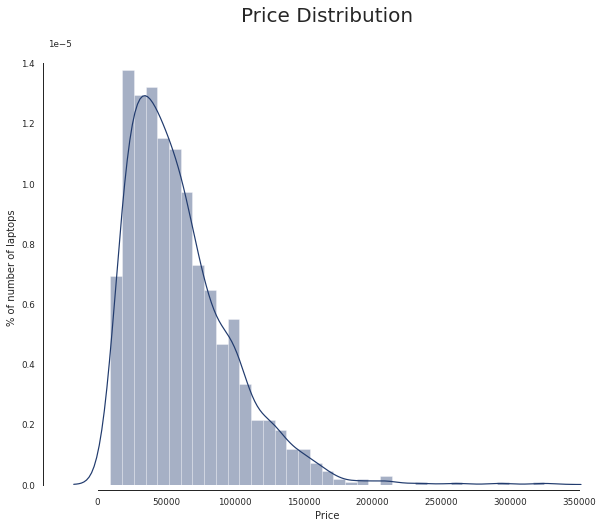

In [243]:
# Price Disribution
plt.figure(figsize=(10,8))
ax = sns.distplot(x=lap_df['Price'])
ax.set_title('Price Distribution\n', fontsize=20)
ax.set_xlabel('Price', fontsize=10)
ax.set_ylabel('% of number of laptops', fontsize=10)
sns.despine(offset=5, trim=True)

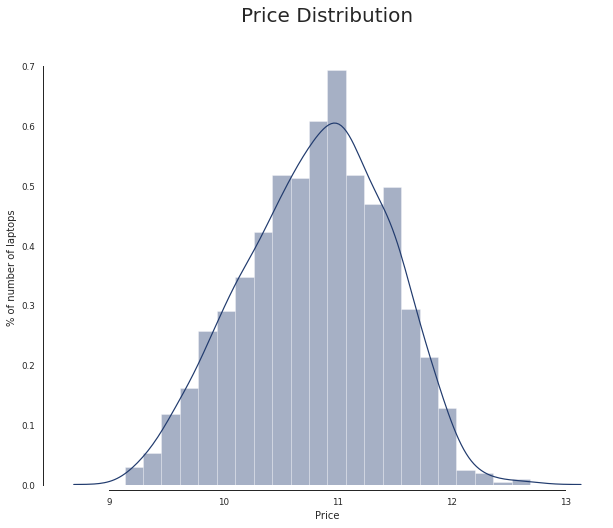

In [244]:
# Price Disribution
plt.figure(figsize=(10,8))
ax = sns.distplot(x=np.log(lap_df['Price']))
ax.set_title('Price Distribution\n', fontsize=20)
ax.set_xlabel('Price', fontsize=10)
ax.set_ylabel('% of number of laptops', fontsize=10)
sns.despine(offset=5, trim=True)

#### Observations:
* **Price is skewed towords right ( laptops with high price are less)**

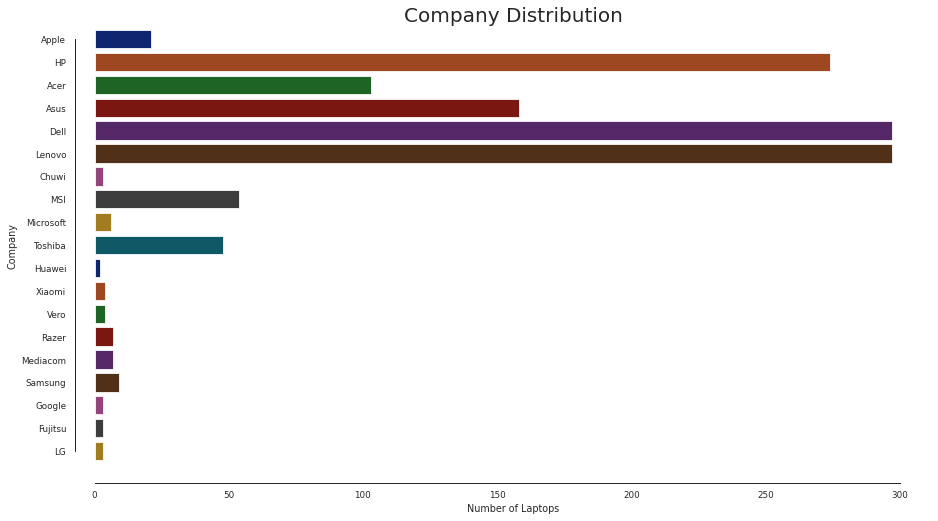

In [245]:
# Explore Company
plt.figure(figsize=(15,8))
ax = sns.countplot(data=lap_df, y='Company', palette='dark')
ax.set_title('Company Distribution', fontsize=20)
ax.set_xlabel('Number of Laptops')
sns.despine(offset=20, trim=True)

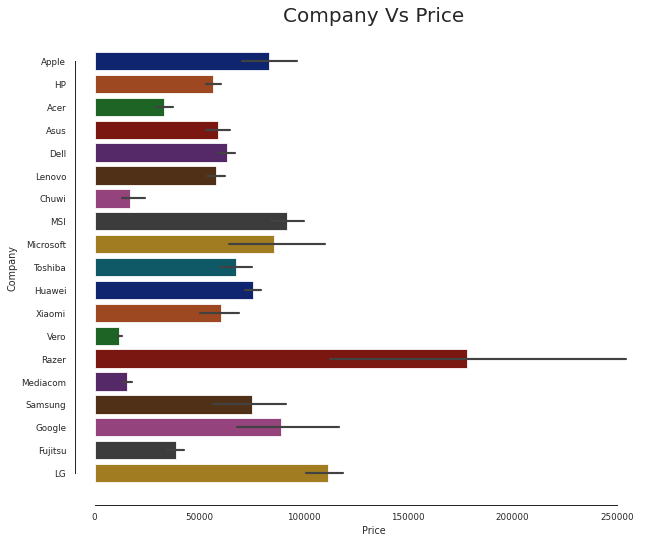

In [246]:
# Explore Company
plt.figure(figsize=(10,8))
ax = sns.barplot(data=lap_df, x='Price', y='Company', palette='dark')
ax.set_title('Company Vs Price\n', fontsize=20)
sns.despine(offset=20, trim=True)

#### Realizations:
* **Popular** Companies are **Dell** and **Lenovo**.
* **Razer** Company has most **expensive** Laptops.
* **Vero** Company has most **cheapest** Laptops.
* **Price** **veries** with **Company Name**

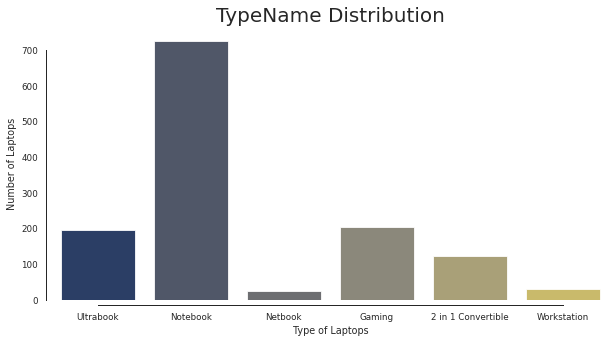

In [247]:
# Explore TypeName
plt.figure(figsize=(10,5))
ax = sns.countplot(x=lap_df['TypeName'])
ax.set_title('TypeName Distribution', fontsize=20)
ax.set_xlabel('Type of Laptops')
ax.set_ylabel('Number of Laptops')
sns.despine(offset=5, trim=True)

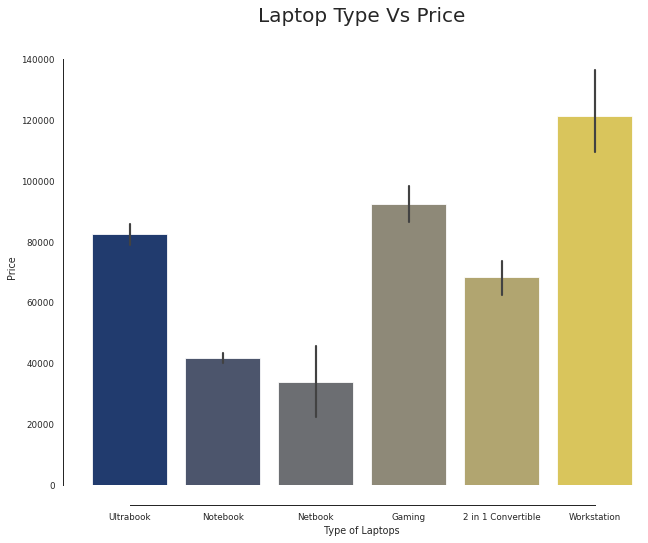

In [248]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=lap_df, x='TypeName', y='Price', saturation=70)
ax.set_title('Laptop Type Vs Price\n', fontsize=20)
ax.set_xlabel('Type of Laptops')
sns.despine(offset=20, trim=True)

#### Realizations:
* **Popular** type is **Notebook**.
* **NetBook** and **Workstation** are **less** in numbers.
* **Workstation and Gaming** are most **expensive** Laptops.
* **Netbook**  are most **cheapest** Laptops.
* **Price** **veries** with **TypeName**

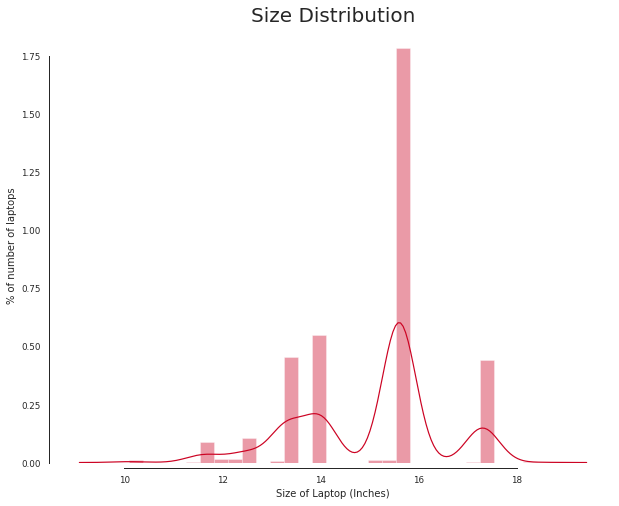

In [249]:
# Explore Inches
plt.figure(figsize=(10,8))
ax = sns.distplot(x=lap_df['Inches'], color='#cc0323')
ax.set_title('Size Distribution', fontsize=20)
ax.set_xlabel('Size of Laptop (Inches)', fontsize=10)
ax.set_ylabel('% of number of laptops', fontsize=10)
sns.despine(offset=5, trim=True)

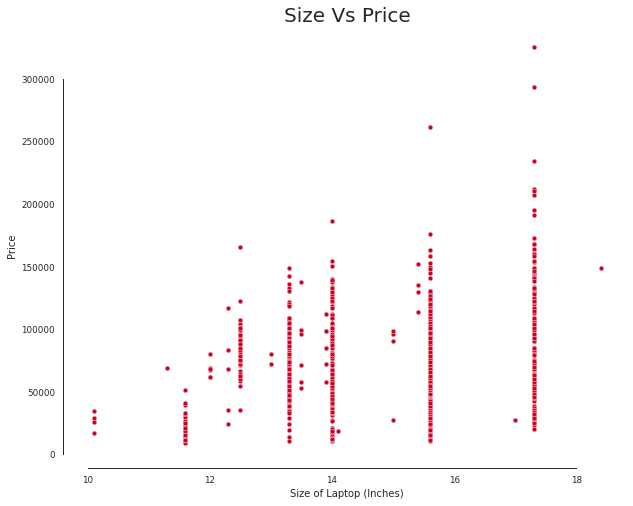

In [250]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=lap_df, x='Inches', y='Price', color='#cc0323')
ax.set_title('Size Vs Price', fontsize=20)
ax.set_xlabel('Size of Laptop (Inches)', fontsize=10)
ax.set_ylabel('Price', fontsize=10)
sns.despine(offset=5, trim=True)

#### Realizations:
* **Number of laptops increases** between **12-13** inches and **15** inches.
* **Slightly +ve** correlation between **Price** and Size.


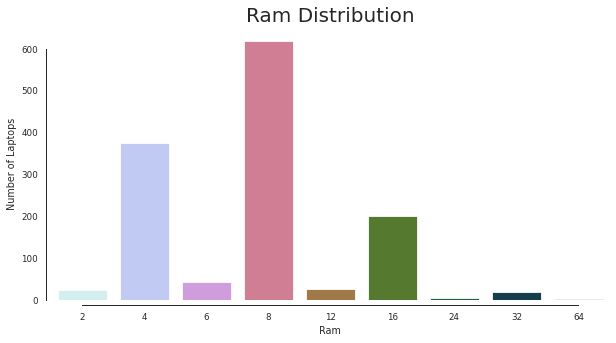

In [251]:
# Explore Ram
plt.figure(figsize=(10,5))
ax = sns.countplot(x=lap_df['Ram'], palette='cubehelix_r',saturation=20)
ax.set_title('Ram Distribution', fontsize=20)
ax.set_xlabel('Ram')
ax.set_ylabel('Number of Laptops')
sns.despine(offset=5, trim=True)

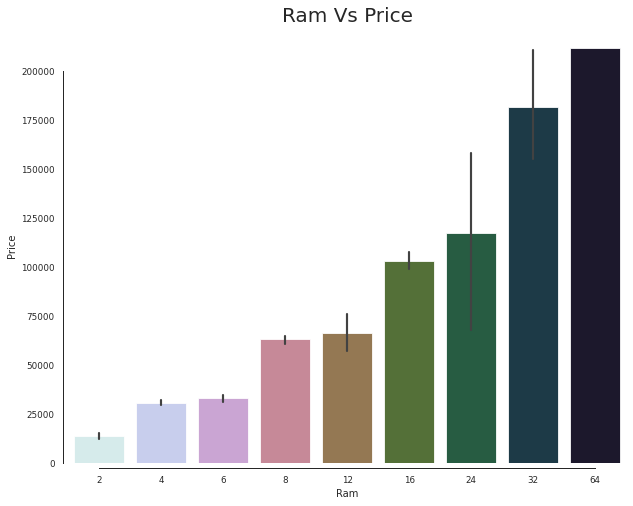

In [252]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=lap_df, x='Ram', y='Price', palette='cubehelix_r')
ax.set_title('Ram Vs Price', fontsize=20)
ax.set_xlabel('Ram', fontsize=10)
ax.set_ylabel('Price', fontsize=10)
sns.despine(offset=5, trim=True)

#### Realizations:
* Most Laptops have **8GB** Ram.
* **Least** number of Laptops with **64GB**.
* Laptops with **High** Ram are most **expensive**.
* Laptop **Ram** and **Price** has a **strong** +ve **linear** relationship.

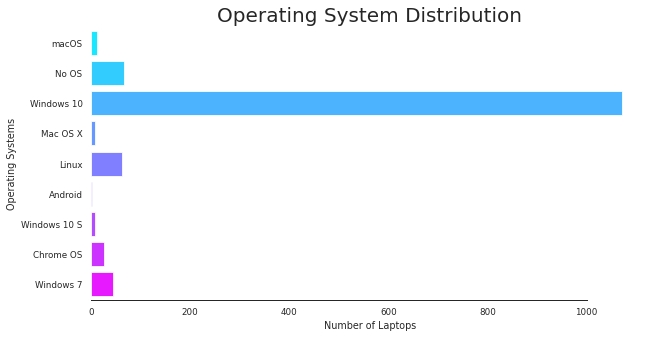

In [253]:
# Explore OpSys
plt.figure(figsize=(10,5))
ax = sns.countplot(y=lap_df['OpSys'], palette='cool',saturation=20)
ax.set_title('Operating System Distribution', fontsize=20)
ax.set_xlabel('Number of Laptops')
ax.set_ylabel('Operating Systems')
sns.despine(left=True, trim=True)

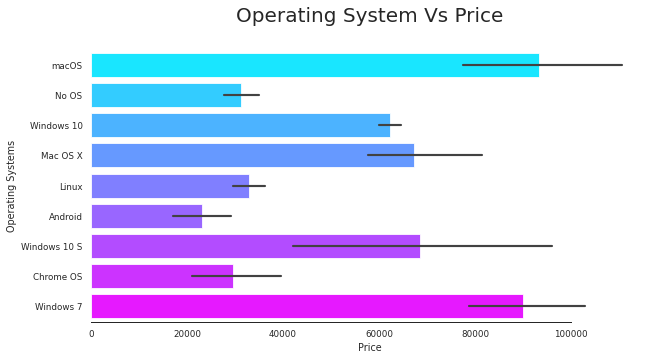

In [254]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=lap_df, y='OpSys', x='Price', palette='cool',saturation=20)
ax.set_title('Operating System Vs Price\n', fontsize=20)
ax.set_xlabel('Price')
ax.set_ylabel('Operating Systems')
sns.despine(left=True, trim=True)

#### Realizations:
* Most Laptops have **Windows 10** OpSys installed.
* **Least** number of Laptops are with **Andriod** OpSys.
* Laptops with **Windows 7 and macOs OpSys** are **expensive**.
* We can **reduce** these Operating System into (Window, Mac, others)

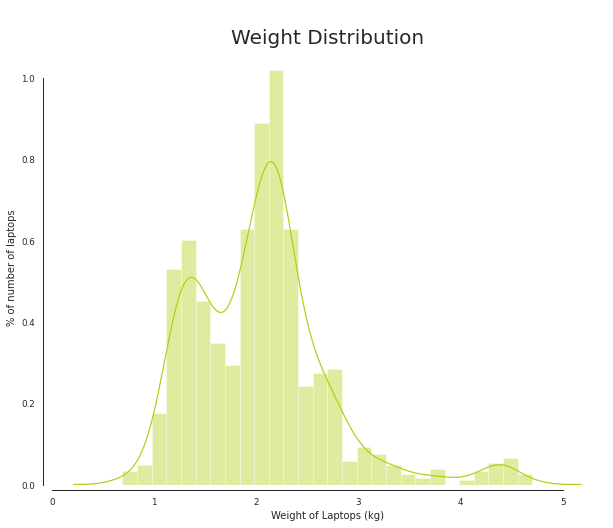

In [255]:
# Explore Weight
plt.figure(figsize=(10,8))
ax = sns.distplot(x=lap_df['Weight'], color='#add111')
ax.set_title('\nWeight Distribution', fontsize=20)
ax.set_xlabel('Weight of Laptops (kg)', fontsize=10)
ax.set_ylabel('% of number of laptops', fontsize=10)
sns.despine(offset=5, trim=True)

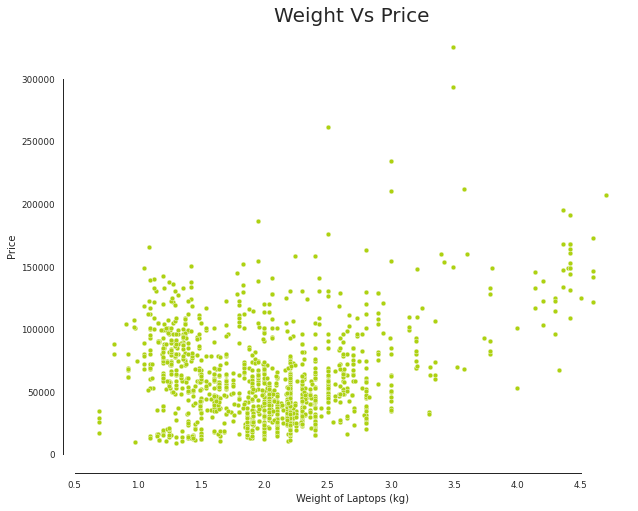

In [256]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=lap_df, x='Weight', y='Price', color='#add111')
ax.set_title('Weight Vs Price', fontsize=20)
ax.set_xlabel('Weight of Laptops (kg)', fontsize=10)
ax.set_ylabel('Price', fontsize=10)
sns.despine(offset=10, trim=True)

#### Realizations:
* Most Laptops have **1.3-1.4kg** and **2.2-2.3kg** weights.
* **Weight** and **Price** has **week +ve linear relation**.


# *Future Engineering*

#### Veriables to perform FE on
    * ScreenResolution
    * Memory
    * CPU
    * GPU
    * OpSys

In [257]:
# Explore ScreenResolution

def ScreenResolution_engineering(lap_df):

    # Touch Screen
    lap_df['TouchScreen'] = lap_df['ScreenResolution'].apply(lambda i:1 if ('Touchscreen' in i) else 0)
    # Ips Panel
    lap_df['IPS'] = lap_df['ScreenResolution'].apply(lambda i:1 if ('IPS' in i) else 0)
    # X resolution
    lap_df['X_res']=lap_df['ScreenResolution'].str.findall(r'(\d+.?\d+)').apply(lambda i: ''.join(map(str,i))).apply(lambda i:i.split('x')[0])
    # Y resolution
    lap_df['Y_res']=lap_df['ScreenResolution'].str.findall(r'(\d+.?\d+)').apply(lambda i: ''.join(map(str,i))).apply(lambda i:i.split('x')[-1])

    lap_df['X_res'] = lap_df['X_res'].astype(int)
    lap_df['Y_res'] = lap_df['Y_res'].astype(int)

    # Lets create PPI (Pixels per inch)
    lap_df['PPI'] = (np.sqrt(lap_df['X_res']) + np.sqrt(lap_df['Y_res']))/lap_df['Inches']

    return lap_df.drop(['Inches', 'X_res', 'Y_res', 'ScreenResolution'], axis=1)


lap_df = ScreenResolution_engineering(lap_df)

Text(0.5, 1.0, 'Correlations in  Dataset\n')

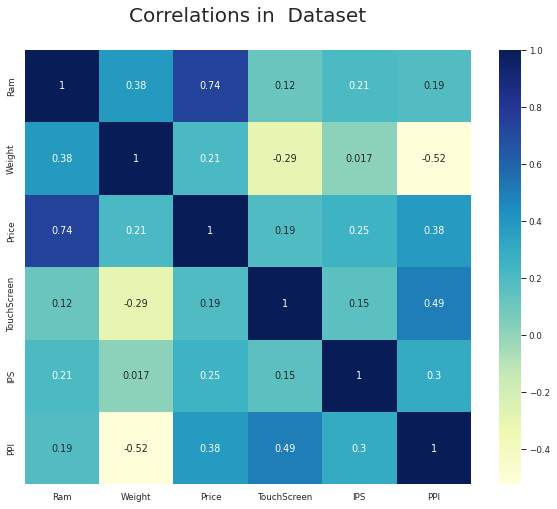

In [258]:
# Correlation in dataset
plt.figure(figsize=(10,8))
ax = sns.heatmap(lap_df.corr(), cmap='YlGnBu', annot=True)
ax.set_title('Correlations in  Dataset\n', fontsize=20)

#### Realizations:
* **PPI** and **Price** have **strong +ve** Linear relationship.
* **TouchScreen** and **Price** have **strong +ve** Linear relationship.
* **IPS** and **Price** have **strong +ve** Linear relationship.

In [259]:
## Memory Exploration

def Memory_enineering(lap_df):
    
    ## all in GBS
    lap_df['Memory']=lap_df['Memory'].str.replace('\.0', '', regex=True)
    lap_df['Memory']=lap_df['Memory'].str.replace('TB', '000', regex=True)
    
    ## Split some values which has +
    df = lap_df.Memory.str.split('+',n=1, expand=True)
    single = df[0].str.strip()
    others = df[1].str.strip().fillna('0')

    ## which has only single Memory
    lap_df['layer1HDD'] = single.apply(lambda i:1 if 'HDD' in i else 0)
    lap_df['layer1SSD'] = single.apply(lambda i:1 if 'SSD' in i else 0)
    lap_df['layer1H'] = single.apply(lambda i:1 if 'Hybrid' in i else 0)
    lap_df['layer1FS'] = single.apply(lambda i:1 if 'Flash Storage' in i else 0)

    ## Which has multiple Memory
    lap_df['layer2HDD'] = others.apply(lambda i:1 if 'HDD' in i else 0)
    lap_df['layer2SSD'] = others.apply(lambda i:1 if 'SSD' in i else 0)
    lap_df['layer2H'] = others.apply(lambda i:1 if 'Hybrid' in i else 0)
    lap_df['layer2FS'] = others.apply(lambda i:1 if 'Flash Storage' in i else 0)

    ## Memory number
    lap_df['first'] = single.str.replace(r'\D', '').astype(int)
    lap_df['second'] = others.str.replace(r'\D', '').astype(int)

    ## Make separate Columns
    lap_df['HDD'] = (lap_df['first']*lap_df['layer1HDD'])+(lap_df['second']*lap_df['layer2HDD'])
    lap_df['SSD'] = (lap_df['first']*lap_df['layer1SSD'])+(lap_df['second']*lap_df['layer2SSD'])
    lap_df['Hybrid'] = (lap_df['first']*lap_df['layer1H'])+(lap_df['second']*lap_df['layer2H'])
    lap_df['Flash Storage'] = (lap_df['first']*lap_df['layer1FS'])+(lap_df['second']*lap_df['layer2FS'])
    
    return lap_df.drop(['layer1HDD', 'layer1SSD',
       'layer1FS', 'layer2HDD', 'layer2SSD', 'layer2FS', 'layer1H', 'first',
       'second', 'layer2H', 'Memory'], axis=1)

lap_df = Memory_enineering(lap_df)

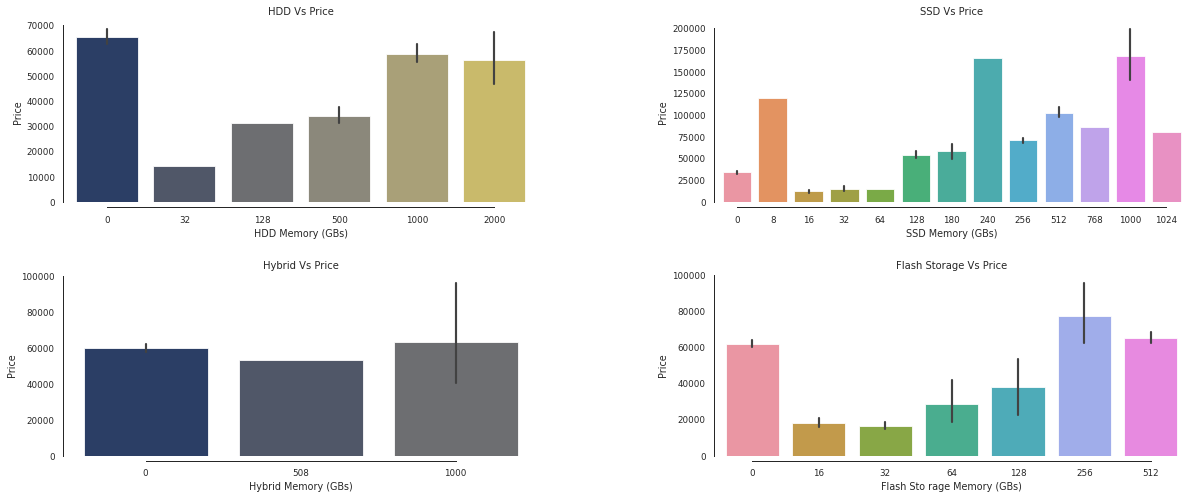

In [260]:
# Explore Memory
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2,2,1)
sns.barplot(data=lap_df, x='HDD', y='Price', ax=ax)
ax.set_title('HDD Vs Price', fontsize=10)
ax.set_xlabel('HDD Memory (GBs)')
ax = fig.add_subplot(2,2,2)
sns.barplot(data=lap_df, x='SSD', y='Price', ax=ax)
ax.set_title('SSD Vs Price', fontsize=10)
ax.set_xlabel('SSD Memory (GBs)')
ax = fig.add_subplot(2,2,3)
sns.barplot(data=lap_df, x='Hybrid', y='Price', ax=ax)
ax.set_title('Hybrid Vs Price', fontsize=10)
ax.set_xlabel('Hybrid Memory (GBs)')
ax = fig.add_subplot(2,2,4)
sns.barplot(data=lap_df, x='Flash Storage', y='Price', ax=ax)
ax.set_title('Flash Storage Vs Price', fontsize=10)
ax.set_xlabel('Flash Sto rage Memory (GBs)')
sns.despine(offset=5, trim=True)
plt.show()

Text(0.5, 1.0, 'Correlations in  Dataset\n')

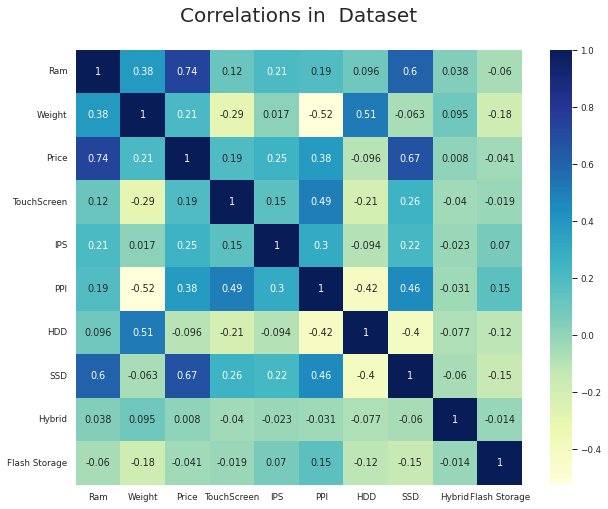

In [261]:
# Correlation in dataset
plt.figure(figsize=(10,8))
ax = sns.heatmap(lap_df.corr(), cmap='YlGnBu', annot=True)
ax.set_title('Correlations in  Dataset\n', fontsize=20)

#### Realizations:
* **SSD** seems to have **+ve Linear** relationship
* **Flash Storage** and **Hybrid** have slightly **-ve Linear** with price relationship
* **Flash Storage** and **Hybrid** can be **deleted** as they have very **small** **correlation** number.

In [262]:
lap_df = lap_df.drop(['Hybrid', 'Flash Storage'], axis=1)

In [263]:
# Explore Cpu
def processor_cat(p_name):
    
    core_i_list=['Intel Core i5', 'Intel Core i3', 'Intel Core i7']
    if(p_name in core_i_list):
        return p_name
    else:
        if(p_name.split()[0] == 'Intel'):
            return 'Other Intel Processor'
        return 'AMD Processor'
    
# Cpu Brand
lap_df['CpuBrand'] = lap_df.Cpu.apply(lambda i:" ".join(i.split()[0:3])).apply(processor_cat)
# Processor Speed
lap_df['ProcessorSpeed'] = lap_df.Cpu.apply(lambda i:i.split()[-1].split('G')[0]).astype('float')

lap_df = lap_df.drop('Cpu', axis=1)

Text(0.5, 1.0, 'Correlations in  Dataset\n')

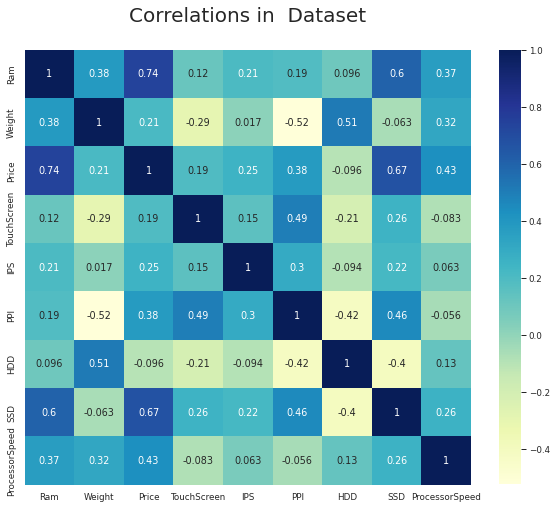

In [264]:
# Correlation in dataset
plt.figure(figsize=(10,8))
ax = sns.heatmap(lap_df.corr(), cmap='YlGnBu', annot=True)
ax.set_title('Correlations in  Dataset\n', fontsize=20)

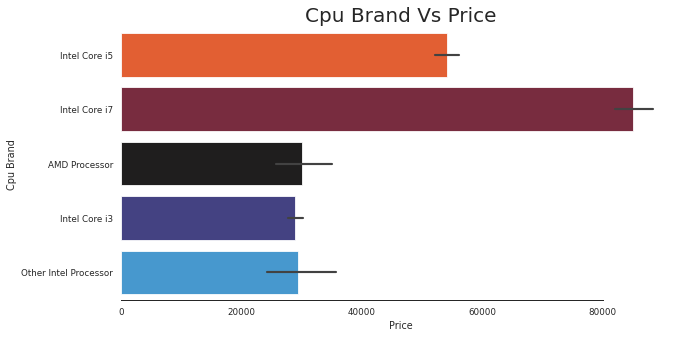

In [265]:
# Explore CpuBrand
plt.figure(figsize=(10,5))
ax = sns.barplot(data=lap_df, y='CpuBrand', x='Price', palette='icefire_r',saturation=20)
ax.set_title('Cpu Brand Vs Price', fontsize=20)
ax.set_xlabel('Price')
ax.set_ylabel('Cpu Brand')
sns.despine(left=True, trim=True)

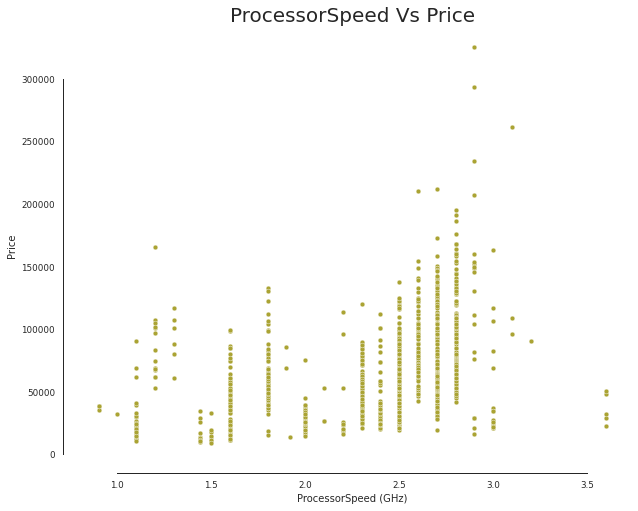

In [266]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=lap_df, x='ProcessorSpeed', y='Price', color='#aaa333')
ax.set_title('ProcessorSpeed Vs Price', fontsize=20)
ax.set_xlabel('ProcessorSpeed (GHz)', fontsize=10)
ax.set_ylabel('Price', fontsize=10)
sns.despine(offset=10, trim=True)

#### Realizations:
* **ProcessorSpeed** and **Price** has a **strong +ve linear** relationship.
* Most **expensive** laptops are **core i7**.

In [267]:
lap_df['GpuBrand'] = lap_df.Gpu.apply(lambda i:i.split()[0])
lap_df = lap_df.drop('Gpu', axis=1)

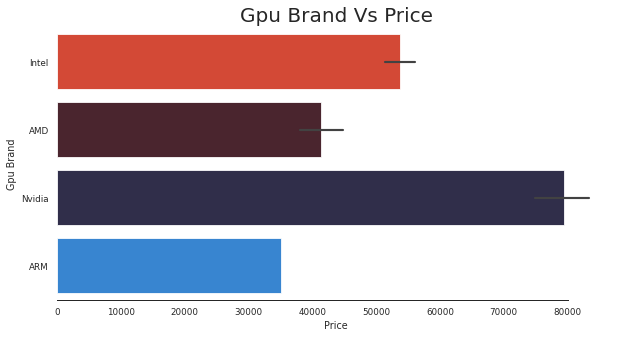

In [268]:
# Explore GpuBrand
plt.figure(figsize=(10,5))
ax = sns.barplot(data=lap_df, y='GpuBrand', x='Price', palette='icefire_r',saturation=20)
ax.set_title('Gpu Brand Vs Price', fontsize=20)
ax.set_xlabel('Price')
ax.set_ylabel('Gpu Brand')
sns.despine(left=True, trim=True)

#### Realizations:
* Most **expensive** laptops have  **Nvidia Graphic cards**.

In [269]:
lap_df['OpSys'] = lap_df.OpSys.apply(lambda i:i.split()[0]).replace(['macOS', 'No', 'Windows', 'Mac', 'Linux', 'Android', 'Chrome'],
                                                                   ['Mac', 'others', 'Windows', 'Mac', 'others', 'others', 'others'])

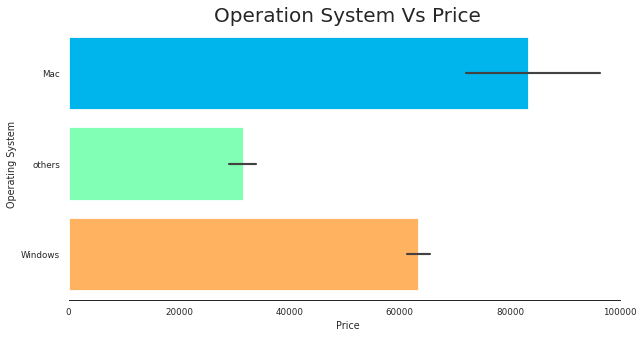

In [270]:
# Explore OpSys
plt.figure(figsize=(10,5))
ax = sns.barplot(data=lap_df, y='OpSys', x='Price', palette='rainbow',saturation=20)
ax.set_title('Operation System Vs Price', fontsize=20)
ax.set_xlabel('Price')
ax.set_ylabel('Operating System')
sns.despine(left=True, trim=True)

#### Realizations:
* Most **expensive** laptops have  **Mac Operating System**.

In [271]:
lap_df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,HDD,SSD,CpuBrand,ProcessorSpeed,GpuBrand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,6.811763,0,128,Intel Core i5,2.3,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,5.108822,0,0,Intel Core i5,1.8,Intel
2,HP,Notebook,8,others,1.86,30636.0000,0,0,4.915459,0,256,Intel Core i5,2.5,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,6.239743,0,512,Intel Core i7,2.7,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,6.811763,0,256,Intel Core i5,3.1,Intel


Text(0.5, 1.0, 'Correlations in  Dataset\n')

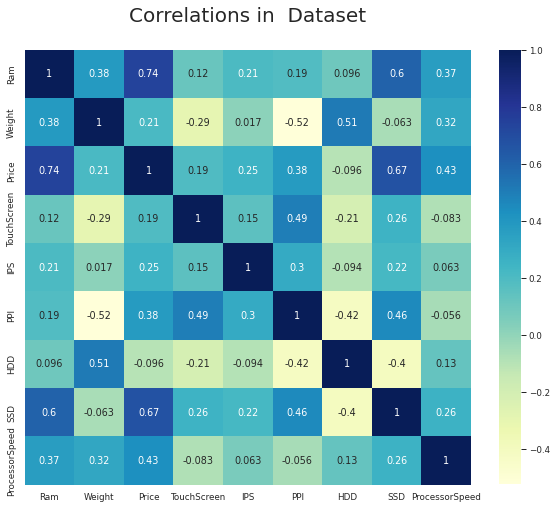

In [272]:
# Correlation in dataset
plt.figure(figsize=(10,8))
ax = sns.heatmap(lap_df.corr(), cmap='YlGnBu', annot=True)
ax.set_title('Correlations in  Dataset\n', fontsize=20)

In [273]:
lap_df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,HDD,SSD,CpuBrand,ProcessorSpeed,GpuBrand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,6.811763,0,128,Intel Core i5,2.3,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,5.108822,0,0,Intel Core i5,1.8,Intel
2,HP,Notebook,8,others,1.86,30636.0000,0,0,4.915459,0,256,Intel Core i5,2.5,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,6.239743,0,512,Intel Core i7,2.7,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,6.811763,0,256,Intel Core i5,3.1,Intel


In [274]:
# One-Hot encoding (OHE) for Nominal Data

# Columns for applying One-Hot encoding
cols = ['Company', 'TypeName', 'OpSys', 'CpuBrand', 'GpuBrand' ]
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(lap_df[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)
# # # One-hot encoding removed index; put it back
data_oh.index = lap_df.index

# # # Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
data_fe = pd.concat([lap_df, data_oh], axis=1)
data_fe = data_fe.drop(['Company', 'TypeName', 'OpSys', 'CpuBrand', 'GpuBrand'], axis=1)
data_fe.head()

,Ram,Weight,Price,TouchScreen,IPS,PPI,HDD,SSD,ProcessorSpeed,Company_Acer,...,OpSys_others,CpuBrand_AMD Processor,CpuBrand_Intel Core i3,CpuBrand_Intel Core i5,CpuBrand_Intel Core i7,CpuBrand_Other Intel Processor,GpuBrand_AMD,GpuBrand_ARM,GpuBrand_Intel,GpuBrand_Nvidia
0,8,1.37,71378.6832,0,1,6.811763,0,128,2.3,0,...,0,0,0,1,0,0,0,0,1,0
1,8,1.34,47895.5232,0,0,5.108822,0,0,1.8,0,...,0,0,0,1,0,0,0,0,1,0
2,8,1.86,30636.0000,0,0,4.915459,0,256,2.5,0,...,1,0,0,1,0,0,0,0,1,0
3,16,1.83,135195.3360,0,1,6.239743,0,512,2.7,0,...,0,0,0,0,1,0,1,0,0,0
4,8,1.37,96095.8080,0,1,6.811763,0,256,3.1,0,...,0,0,0,1,0,0,0,0,1,0


# *Modeling*

In [275]:
X = data_fe.drop('Price', axis=1)
y = np.log(data_fe['Price'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    return (scores.mean(), scores.std())

X_train shape: (977, 45)
y_train shape: (977,)
X_test shape: (326, 45)


In [276]:
r_s = 2
regressor = []

# Algos
regressor.append(KNeighborsRegressor())
regressor.append(LinearRegression())
regressor.append(SVR())
regressor.append(DecisionTreeRegressor(random_state=r_s))
regressor.append(ExtraTreesRegressor(random_state=r_s))
regressor.append(RandomForestRegressor(random_state=r_s))
regressor.append(Lasso(random_state=r_s))
regressor.append(Ridge(random_state=r_s))
regressor.append(XGBRegressor(learning_rate=0.5))
regressor.append(AdaBoostRegressor(random_state=r_s,learning_rate=0.5))

score_results = [cross_val(model,X_train, y_train, 5) for model in regressor]


In [277]:
# Convert algo scores into Dataframe
algo_df=pd.DataFrame({"CrossValMeans":[float("{:.2f}".format(score[0])) for score in score_results],
                      "CrossValerrors":[float("{:.2f}".format(score[1])) for score in score_results],
                      "Algorithm":["KNeighborsRegressor","LinearRegression","SVR",
                                  "DecisionTreeRegressor","ExtraTreesRegressor","RandomForestRegressor",
                                   "Lasso","Ridge", "XGBRegressor", "AdaBoostRegressor"]})
# Check df
algo_df=algo_df.set_index('Algorithm')
algo_df

,CrossValMeans,CrossValerrors
Algorithm,,
KNeighborsRegressor,0.81,0.03
LinearRegression,0.82,0.05
SVR,0.51,0.10
DecisionTreeRegressor,0.80,0.03
ExtraTreesRegressor,0.86,0.03
RandomForestRegressor,0.89,0.02
Lasso,0.46,0.06
Ridge,0.82,0.05
XGBRegressor,0.88,0.02


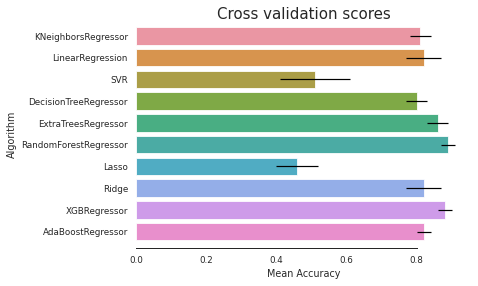

In [278]:
ax = sns.barplot("CrossValMeans",algo_df.index,data = algo_df,**{'xerr':algo_df['CrossValerrors']})
ax.set_xlabel("Mean Accuracy")
ax.set_title("Cross validation scores", fontsize=15)
sns.despine(left=True, offset=5, trim=True)

#### Realizations:
* **XGBRegressor**, **ExtraTreesRegressor** and **RandomForestRegressor** has the **best** **score**.

In [279]:
# Model
model=ExtraTreesRegressor(n_estimators=500,
                              random_state=5,
                              max_samples=0.97,
                              max_features=0.80,
                              bootstrap=True,
                              max_depth=15)
# Fit Model
model.fit(X_train, y_train)

# y_predict
y_predict = model.predict(X_test)

# Score
print(f" R^2 Score: {R2(y_test, y_predict)}\n")
print(f" Mean Absolute Error: {MAE(y_test, y_predict)}\n")

 R^2 Score: 0.8606334617303473

 Mean Absolute Error: 0.16711940026377928



In [280]:
# Model
model=RandomForestRegressor(n_estimators=200,
                              random_state=3,
                              max_samples=0.8,
                              max_features=0.5,
                              max_depth=15)

# Fit Model
model.fit(X_train, y_train)

# y_predict
y_predict = model.predict(X_test)

# Score
print(f" R^2 Score: {R2(y_test, y_predict)}\n")
print(f" Mean Absolute Error: {MAE(y_test, y_predict)}\n")

 R^2 Score: 0.8638337738881514

 Mean Absolute Error: 0.16938046164772644



In [281]:
# Model
model= XGBRegressor(learning_rate=0.1, n_estimators=100)


# Fit Model
model.fit(X_train, y_train)

# y_predict
y_predict = model.predict(X_test)

# Score
print(f" R^2 Score: {R2(y_test, y_predict)}\n")
print(f" Mean Absolute Error: {MAE(y_test, y_predict)}\n")

 R^2 Score: 0.8818337072337916

 Mean Absolute Error: 0.1563155918821227



In [282]:
# Only Deploment is remaining